In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt # data visualization
import ipywidgets as widgets # interactive widgets
from ipywidgets import Box

In [15]:
df = pd.read_csv('../Data/tracks_cleaned.csv')

In [16]:
# Data cleaning and arrangement
df.drop(['key', 'release_date'],axis=1, inplace=True)
time_signature_df=pd.get_dummies(df["time_signature"])
df = pd.concat([df,time_signature_df],axis=1)
df['mode'] = np.where(df['mode']=='Major', 1, 0)
# change songs duration from milliseconds to seconds
df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True)

In [17]:
X= df.loc[:,df.columns !="popularity"] # all the features accept DV
y = df["popularity"] # the DV

In [18]:
# separate the data to training and testing
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)


In [19]:
# create a linear regression, random forest & decision tree object
model_regression = linear_model.LinearRegression()
model_random_forest = RandomForestRegressor()
model_decision_tree = DecisionTreeRegressor()

In [20]:
model_regression.fit(X_train,y_train)
model_random_forest.fit(X_train,y_train)
model_decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
# estimate the R² score on training and testing data
# (1) Linear regression
model_regression.score(X_train,y_train)
rm = model_regression.score(X_test,y_test)
# (2) Random Forest
model_random_forest.score(X_train,y_train)
rf = model_random_forest.score(X_test,y_test)
# (3) Decision Tree
model_decision_tree.score(X_train,y_train)
dt = model_decision_tree.score(X_test,y_test)

print("Linear regression = " + str(rm))
print("Random Forest = " + str(rf))
print("Decision Tree = " + str(dt))

Linear regression = 0.378474987145639
Random Forest = 0.5221505722590116
Decision Tree = 0.029999925963122065


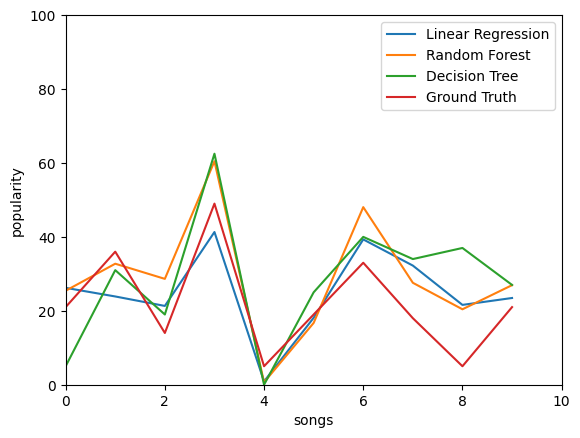

In [23]:
test_samples = 10 # amount of songs which would be evaluated
# initialized empty lists for the models predictions
regression = [] 
random_forest = [] 
decision_tree = []
ground_truth = []
# collecting the models' predictions 
for i in range(test_samples): 
    regression.append(model_regression.predict([X_test[i]])) 
    random_forest.append(model_random_forest.predict([X_test[i]]))
    decision_tree.append(model_decision_tree.predict([X_test[i]]))
    ground_truth.append(y_test[i])
# Plotting the models' predictions in comparison to the ground truth
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
plt.legend()
plt.show()